# Carbon Intensity Data, Initial Data Inspection

# Loading the Data

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'CarbonCatalogueDescriptor.xlsx'
xls = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
print(xls.sheet_names)

['Product Level Data', 'Stage Level Data', 'Glossary', 'Product Viewer']


In [113]:
## Going to inspect a few sheets to see what the data looks like
df = pd.read_excel(xls, sheet_name='Product Level Data')  
display(df.head())  

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


For Carbon Intensity we are concerned with the PCF per product weight. The information for these figures is given in the following row: *Carbon intensity

## Initial Data Inspection for Product Level Data

In [100]:
import numpy as np

null_values = np.where(pd.isnull(df))

Can see from visiual inspection that these are all in column 24, which provides details to adjustments to the raw data. Therefore the null values are not a concern.

In [16]:
df.shape

(866, 25)

We have 25 columns and 865 data entries.

In [13]:
df.dtypes

*PCF-ID                                       object
Year of reporting                              int64
*Stage-level CO2e available                   object
Product name (and functional unit)            object
Product detail                                object
Company                                       object
Country (where company is incorporated)       object
Company's GICS Industry Group                 object
Company's GICS Industry                       object
*Company's sector                             object
Product weight (kg)                          float64
*Source for product weight                    object
Product's carbon footprint (PCF, kg CO2e)    float64
*Carbon intensity                            float64
Protocol used for PCF                         object
Relative change in PCF vs previous            object
Company-reported reason for change            object
*Change reason category                       object
*%Upstream estimated from %Operations         

Carbon itensity is a float row, as we should expect.



### Checking catagorical variables

We are looking at the differences amoung various sectors and countries . Therefore, will check the prevelence of each type.

#### Sectors


In [114]:
unique_items = df["*Company's sector"].unique()

counts = df["*Company's sector"].value_counts()

print(counts) 

*Company's sector
Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Automobiles & components                 75
Construction & commercial materials      67
Comm. equipm. & capital goods            56
Packaging for consumer goods             38
Name: count, dtype: int64


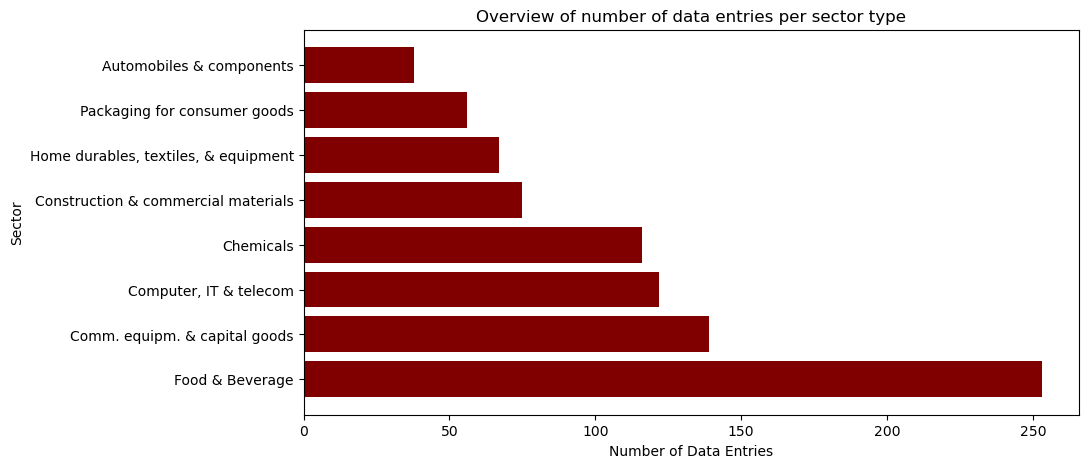

In [115]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))

plt.barh(unique_items,counts, color ='maroon', height=0.8, align='center')

plt.xlabel("Number of Data Entries")
plt.ylabel("Sector")
plt.title("Overview of number of data entries per sector type")
plt.show()

#### Countries

In [135]:
### First going to remain country column becuase the long name is going to cause problems. 
df = df.rename(columns={'Country (where company is incorporated)': 'Country'})

unique_items = df["Country"].unique()

counts = df["Country"].value_counts()

print(counts) 

Country
USA               305
Japan             110
Germany            67
Taiwan             60
Netherlands        35
Finland            35
United Kingdom     32
Switzerland        28
Sweden             26
Italy              23
South Korea        22
France             20
Brazil             17
India              16
Spain              13
South Africa       11
Belgium             8
China               6
Canada              6
Ireland             6
Australia           6
Malaysia            4
Chile               3
Colombia            2
Luxembourg          2
Lithuania           1
Indonesia           1
Greece              1
Name: count, dtype: int64


There are only minimal data entries for many countries. I would suggest excluding countries with less than 20 data entires.

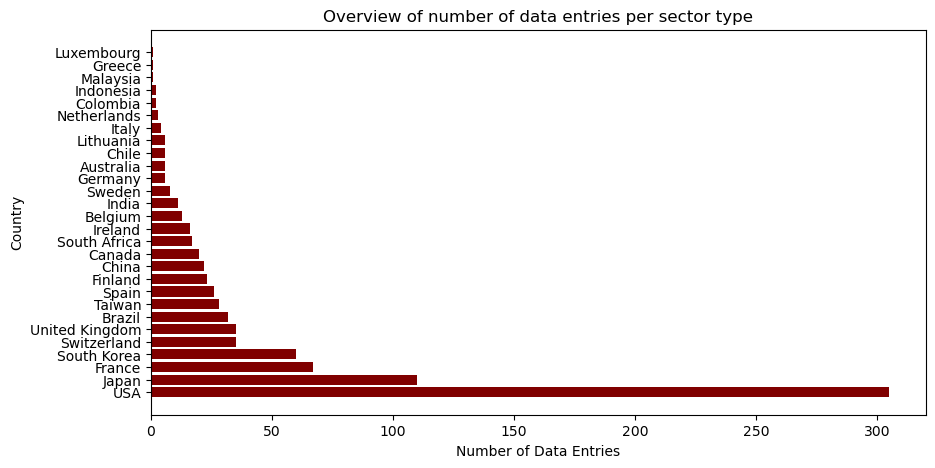

In [134]:

fig = plt.figure(figsize = (10, 5))

plt.barh(unique_items,counts, color ='maroon', height=0.8, align='center')

plt.xlabel("Number of Data Entries")
plt.ylabel("Country")
plt.title("Overview of number of data entries per sector type")
plt.show()

### Checking distribution of continuous variables

The most relevant continuous variable for us are Porduct Weight (kg) and Carbon Intensity. Therefore, we will check the histribution of these.

#### Product Weight (kg)

<Axes: >

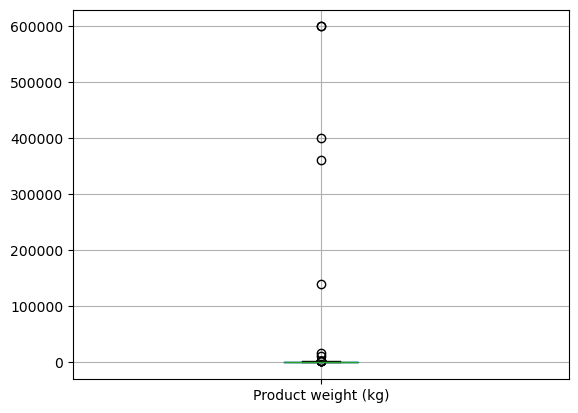

In [47]:
df.boxplot(column='Product weight (kg)', return_type='axes')

It's clear there are some huge outliers in terms of product weight which we need to exclude. It also seems funny that some weights are showing as almost zero - worth checking there are no 0 values in there.

The minimum value is 0.00127018044kg


<Axes: >

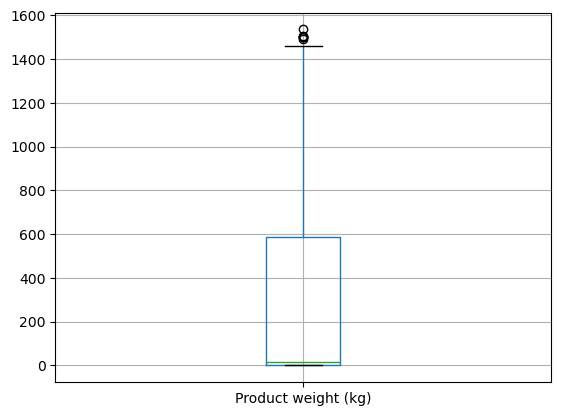

In [76]:
# Check for 0 values
min_value = df["Product weight (kg)"].min()
print(f'The minimum value is {min_value}kg')

q_hi  = df["Product weight (kg)"].quantile(0.95)
q_low = df["Product weight (kg)"].quantile(0.05)

df_filtered = df[(df["Product weight (kg)"] < q_hi) & (df["Product weight (kg)"] > q_low)]

df_filtered.boxplot(column='Product weight (kg)', return_type='axes')

There are no zero entries which is good. However, the data is clearly skewed. We can try a logarithmic transformation to see if this shows a distribution.

Text(0.5, 1.0, 'Log-Transformed Data')

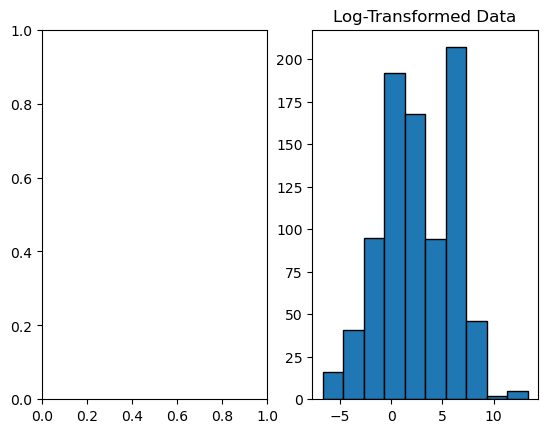

In [62]:
weight_df = df['Product weight (kg)']

log_weight_data = np.log(weight_df)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[1].hist(log_weight_data, edgecolor='black')
axs[1].set_title('Log-Transformed Data')

It looks better but still not perfectly normally distributed.

##### Looking at the distribution per sector

/var/folders/wn/w5pc_52n541b5w4m12ltydkw0000gs/T/ipykernel_84212/3148067196.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=groups.index)
/opt/anaconda3/envs/test/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


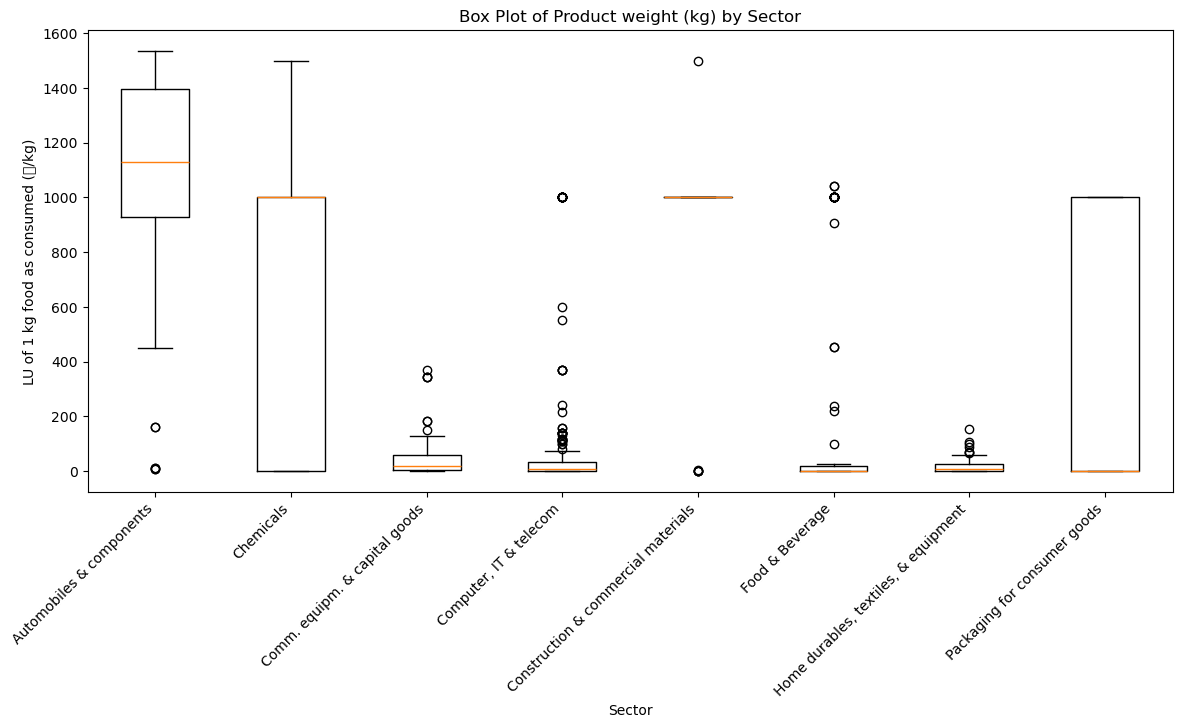

In [80]:
grouped = df_filtered.groupby("*Company's sector")

grouped_dict = {name: group for name, group in grouped}

groups = df_filtered.groupby("*Company's sector")['Product weight (kg)'].apply(list)

plt.figure(figsize=(14, 6))

# Creating the box plot (we pass a list of calorie values per group)
plt.boxplot(groups, labels=groups.index)

# Add a title and labels
plt.title('Box Plot of Product weight (kg) by Sector')
plt.xlabel('Sector')
plt.ylabel('LU of 1 kg food as consumed (㎡/kg)')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


This shows that the different sectors have product weights that vary significantly.

#### Carbon Intensity

<Axes: >

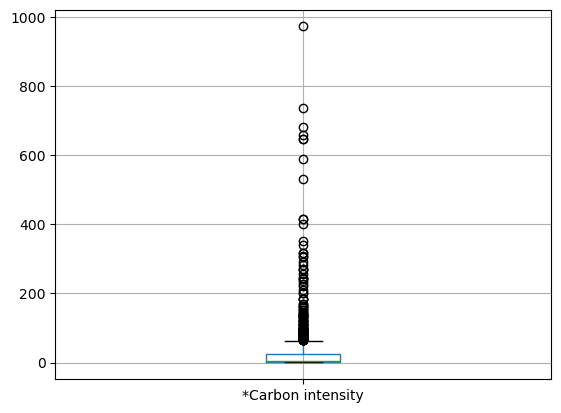

In [83]:
df.boxplot(column= "*Carbon intensity", return_type='axes')

This graph shows that there are a huge number of outliers, this suggests the data is heavily skewed. Looking at the historgrams shows that the data is roughly normally distributed when log transformed.

Text(0.5, 1.0, 'Log-Transformed Data')

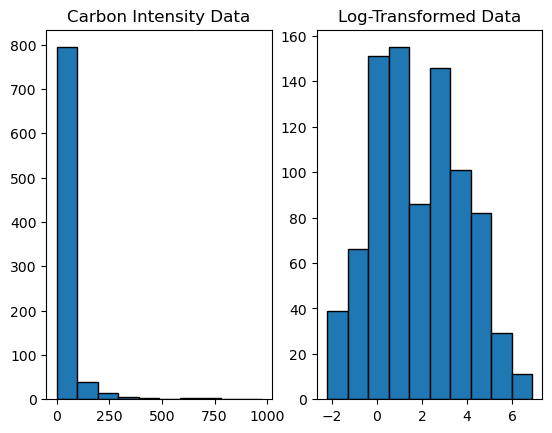

In [92]:
ci_df = df["*Carbon intensity"]
log_ci_data = np.log(ci_df)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(ci_df, edgecolor='black')
axs[0].set_title('Carbon Intensity Data')

axs[1].hist(log_ci_data, edgecolor='black')
axs[1].set_title('Log-Transformed Data')


## Initial Data Inspection for Stage Level Data

In [139]:
df_sld = pd.read_excel(xls, sheet_name='Stage Level Data')  

display(df_sld.head())  

,*PCF-ID,Description of LCA stage,Scope-characterization of LCA stage,*Assigned value chain portion,Emissions at stage (kg CO2e),*Emissions at this stage are exclusively transport,*Emissions at this stage are exclusively EndOfLife
0,10056-1-2014,Other: Raw Material,Scope 3,Upstream,1.15,No,No
1,10056-1-2014,Manufacturing,Scope 1 & 2,Operations,0.60,No,No
2,10056-1-2014,Consumer use,Scope 3,Downstream,0.15,No,No
3,10056-1-2014,Transportation,Scope 3,Downstream,0.09,Yes,No
4,10056-1-2014,Storage,Scope 3,Downstream,0.01,No,No


For products reported, this shows how their CO2 emissions break down into various LCA stages. This is needed for part 3 of our analysis. This is going to be more complicated as we aren't given the Carbon Intensity per stage, only the raw about of CO2 emissions. 

In [140]:
null_values = np.where(pd.isnull(df_sld))
print(null_values)

(array([], dtype=int64), array([], dtype=int64))


In [141]:
print(df_sld.shape)

df_sld.dtypes

(1764, 7)


*PCF-ID                                                object
Description of LCA stage                               object
Scope-characterization of LCA stage                    object
*Assigned value chain portion                          object
Emissions at stage (kg CO2e)                          float64
*Emissions at this stage are exclusively transport     object
*Emissions at this stage are exclusively EndOfLife     object
dtype: object

In [ ]:
We will be looking at co2, so will check the distribution:

Text(0.5, 1.0, 'Log-Transformed Data')

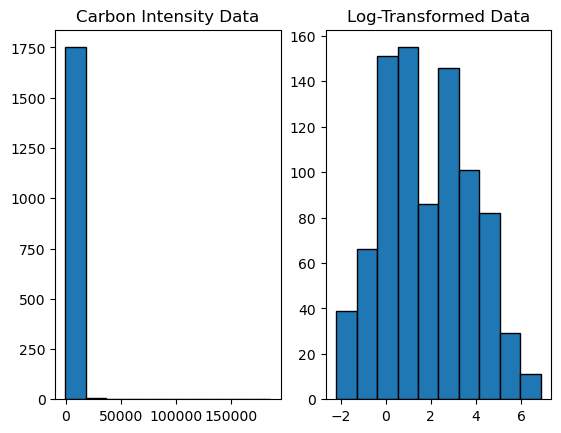

In [142]:
co2_df = df_sld["Emissions at stage (kg CO2e)"]
log_co2_data = np.log(ci_df)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(co2_df, edgecolor='black')
axs[0].set_title('Carbon Intensity Data')

axs[1].hist(log_co2_data, edgecolor='black')
axs[1].set_title('Log-Transformed Data')


And will check the counts for each stage in the catagorising process:

In [154]:
unique_items = df_sld["Description of LCA stage"].unique()

counts = df["Description of LCA stage"].value_counts()

print(counts) 

combined_df = pd.concat([df_sld, df], ignore_index=True)

counts = combined_df["Description of LCA stage"].value_counts()

filtered_counts = counts[counts >= 10]

print(filtered_counts)

Description of LCA stage
Transportation                                  160
Production                                      154
Manufacturing                                   133
Consumer use                                    119
Material acquisition                            117
                                               ... 
Material (steel, cast iron, zinc)                 1
Other: Use of sold products, coal combustion      1
End of life (recycling, cut-off)                  1
Casting                                           1
Other: Maintenance                                1
Name: count, Length: 254, dtype: int64
Description of LCA stage
Transportation                                                                320
Production                                                                    308
Manufacturing                                                                 266
Consumer use                                                                  238
Material ac

Looks like there are lots of stage levels with only one data entry. We should exclude these!